In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Percentiles

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [3]:
v = [1, 7, 3, 9, 5]
percentile(20, v)

1

* A) 1
* B) 3
* C) 5
* D) 7
* E) 0

In [6]:
v = [1, 7, 3, 9, 5]
percentile(10, v)

1

* A) 1
* B) 3
* C) 5
* D) 7
* E) 0

In [ ]:
v = [1, 7, 3, 9, 5]
percentile(50, v)

* A) 1
* B) 3
* C) 5
* D) 7
* E) 9

In [7]:
v = [1, 7, 3, 9, 5]
percentile(39, v) == percentile(40, v)

True

* A) True
* B) False

In [8]:
v = [1, 7, 3, 9, 5]
percentile(40, v) == percentile(41, v)

False

* A) True
* B) False

In [9]:
v = [1, 7, 3, 9, 5]
percentile(40, v)

3

In [10]:
Table(['Percent', 'Percentile']).with_rows([
   [ 1, percentile( 1, v)], 
   [10, percentile(10, v)], 
   [20, percentile(20, v)], 
   [39, percentile(39, v)], 
   [40, percentile(40, v)], 
   [41, percentile(41, v)], 
   [50, percentile(50, v)], 
])

Percent,Percentile
1,1
10,1
20,1
39,3
40,3
41,5
50,5


## Estimation

In [11]:
sf = Table.read_table('san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))
sf = sf.where('Total Compensation', are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [12]:
sf.sort('Total Compensation')

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [13]:
sf.sort('Total Compensation', descending=True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


In [14]:
sf.where("Job", "Mayor")

Organization Group,Job,Total Compensation
General Administration & Finance,Mayor,"379,798"


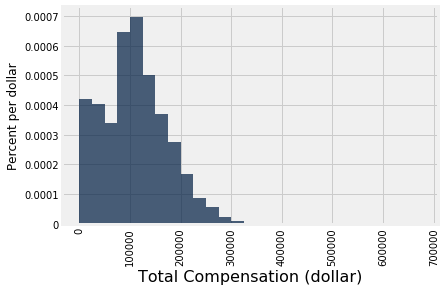

In [15]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, unit='dollar')

In [20]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Culture & Recreation,Recreation Leader,"16,736"
Public Protection,Police Officer 2,"168,464"
Human Welfare & Neighborhood Development,Employment & Training Spec 3,"116,724"


In [21]:
np.median(sample_from_population.column('Total Compensation'))

104986.28999999999

In [19]:
np.median(sf.column('Total Compensation'))

107219.48

In [18]:
percentile(50, sample_from_population.column('Total Compensation'))

108829.00999999999

## Sample variability

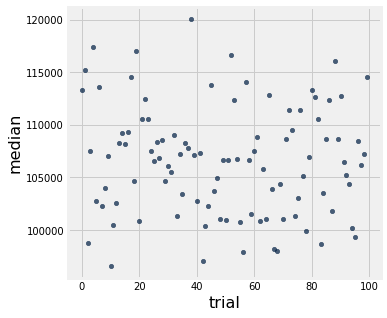

In [22]:
medians = make_array()
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    median = np.median(sample.column('Total Compensation'))
    medians = np.append(medians, median)

Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')

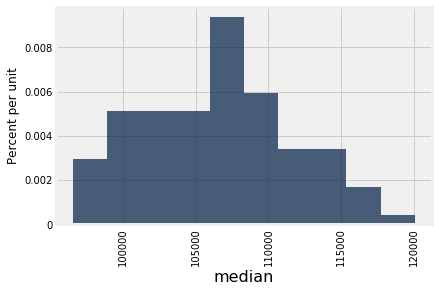

In [23]:
Table().with_columns('median', medians).hist()

In [24]:
percentile(2.5, medians)

97925.274999999994

In [25]:
percentile(97.5, medians)

117032.51999999999

In [26]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 97925.275 and 117032.52


## Bootstrap

In [27]:
sample_from_population # From now on, this is all we have.

Organization Group,Job,Total Compensation
Culture & Recreation,Recreation Leader,"16,736"
Public Protection,Police Officer 2,"168,464"
Human Welfare & Neighborhood Development,Employment & Training Spec 3,"116,724"
Public Protection,Sergeant 3,"250,346"
Culture & Recreation,Librarian 1,"114,389"
Community Health,Special Nurse,"30,576"
Public Protection,Deputy Sheriff,"162,255"
Community Health,Senior Physician Specialist,"146,537"
Community Health,Special Nurse,"11,345"
Public Protection,IS Engineer-Senior,"179,436"


In [28]:
np.median(sample_from_population.column('Total Compensation'))

104986.28999999999

In [30]:
resample_1 = sample_from_population.sample()
resample_1.sort("Total Compensation")

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"11,407"
General Administration & Finance,Commissioner No Benefits,"11,896"
General Administration & Finance,Personnel Technician,"12,379"
Community Health,Assistant Storekeeper,"14,333"
Community Health,Assistant Storekeeper,"14,333"
Culture & Recreation,Recreation Leader,"16,532"
Culture & Recreation,Recreation Leader,"16,532"
Culture & Recreation,Sheet Metal Worker,"16,633"
Culture & Recreation,Sheet Metal Worker,"16,633"
Culture & Recreation,Recreation Leader,"16,736"


In [31]:
np.median(resample_1.column('Total Compensation'))

109697.14999999999

In [32]:
resample_2 = sample_from_population.sample()
np.median(resample_2.column('Total Compensation'))

106646.19

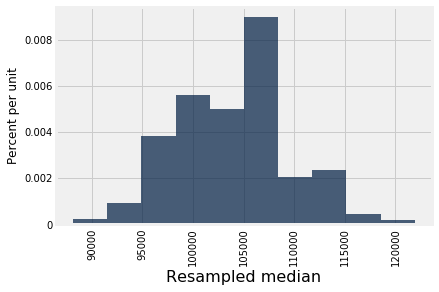

In [33]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
Table().with_column('Resampled median', resampled_medians).hist()

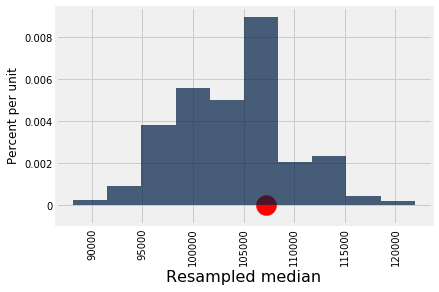

In [35]:
Table().with_column('Resampled median', resampled_medians).hist()
# True population median
pop_median = np.median(sf.column("Total Compensation"))
plots.scatter(pop_median, 0, color='red', s=400)

## Confidence Intervals

In [36]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 92960.72 and 115062.24


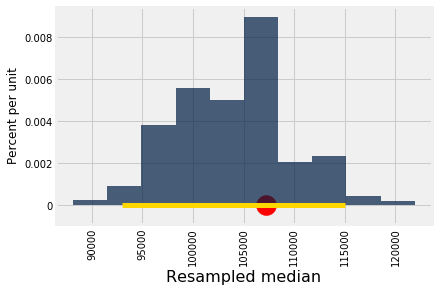

In [37]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

In [38]:
sample_from_population = sf.sample(200)
median_of_sample = np.median(sample_from_population.column('Total Compensation'))
print('Sample median:', median_of_sample)

Sample median: 107126.36


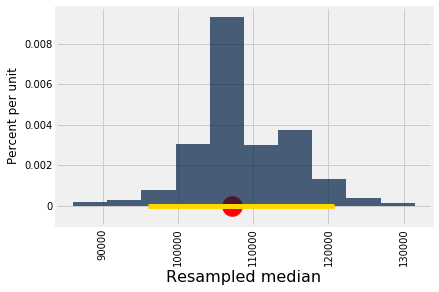

In [39]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

In [40]:
# This simulation takes several minutes

intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200)
    resampled_medians = make_array()
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('Total Compensation'))
        resampled_medians = np.append(resampled_medians, median)

    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]

    intervals.append(interval_95)
    print('trial number', j, 'of 100')

trial number 0 of 100
trial number 1 of 100
trial number 2 of 100
trial number 3 of 100
trial number 4 of 100
trial number 5 of 100
trial number 6 of 100
trial number 7 of 100
trial number 8 of 100
trial number 9 of 100
trial number 10 of 100
trial number 11 of 100
trial number 12 of 100
trial number 13 of 100
trial number 14 of 100
trial number 15 of 100
trial number 16 of 100
trial number 17 of 100
trial number 18 of 100
trial number 19 of 100
trial number 20 of 100
trial number 21 of 100
trial number 22 of 100
trial number 23 of 100
trial number 24 of 100
trial number 25 of 100
trial number 26 of 100
trial number 27 of 100
trial number 28 of 100
trial number 29 of 100
trial number 30 of 100
trial number 31 of 100
trial number 32 of 100
trial number 33 of 100
trial number 34 of 100
trial number 35 of 100
trial number 36 of 100
trial number 37 of 100
trial number 38 of 100
trial number 39 of 100
trial number 40 of 100
trial number 41 of 100
trial number 42 of 100
trial number 43 of 10

In [41]:
truth = np.median(sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

94